<a href="https://colab.research.google.com/github/J-Pitts/J-Pitts.github.io/blob/master/AdultIncomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [15]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                 names =['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                        'race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

In [16]:
print('Total number of records:',len(df))

#print(df.tail())

n = len(pd.unique(df['class']))
print('Number of Classes:',n)

print(df['class'])
df = df.dropna()

over_50 = df[df['class'] == ' >50K'].shape[0]
under_50 = df[df['class'] == ' <=50K'].shape[0]
print('Percentage Over $50,000: {}%'.format(round(over_50 *100/ len(df),2)))
print('Percentage At Or Below $50,000: {}%'.format(round(under_50 *100/ len(df),2)))

Total number of records: 32561
Number of Classes: 2
0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object
Percentage Over $50,000: 24.08%
Percentage At Or Below $50,000: 75.92%


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:

df['class'] = df['class'].map({' >50K':1,' <=50K':0})

# separate features and target
y = df['class']
X = df.drop('class', axis=1)

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17)

numerical_cols = ['age','education-num','capital-gain','capital-loss','hours-per-week']
categorical_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

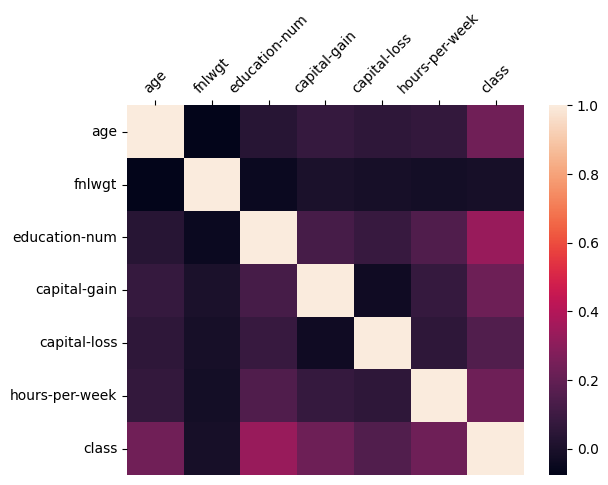

In [19]:
import seaborn as sns
corr = df.corr(numeric_only = True)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
plt.show()

DecisionTreeClassifier() Accuracy : 82.15%


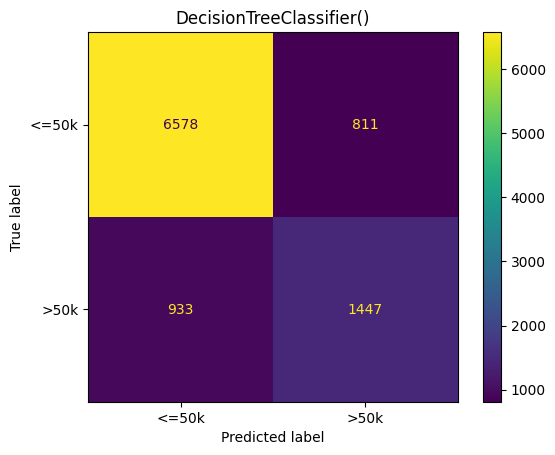

SVC() Accuracy : 83.67%


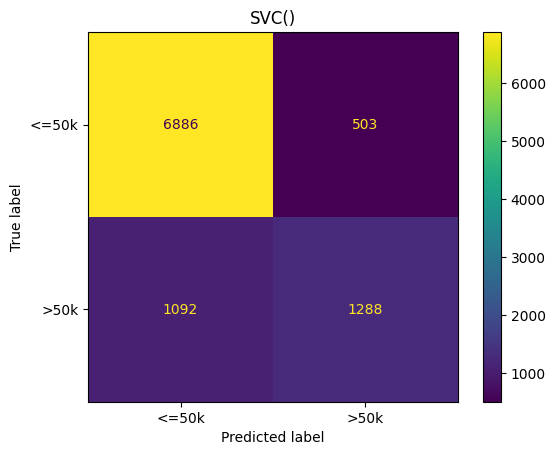

BaggingClassifier(n_estimators=100) Accuracy : 84.56%


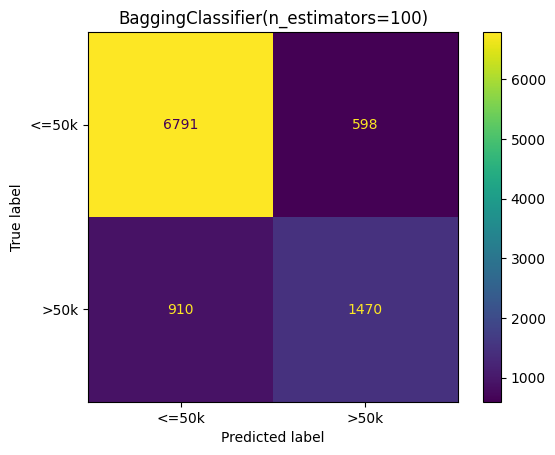

RandomForestClassifier() Accuracy : 84.27%


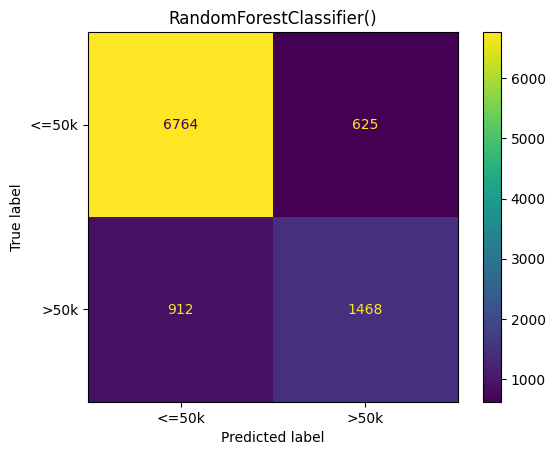

GradientBoostingClassifier() Accuracy : 86.60%


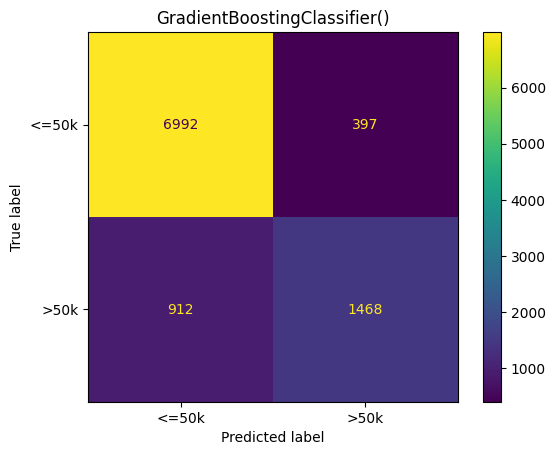

LogisticRegression(max_iter=1000, random_state=42) Accuracy : 85.18%


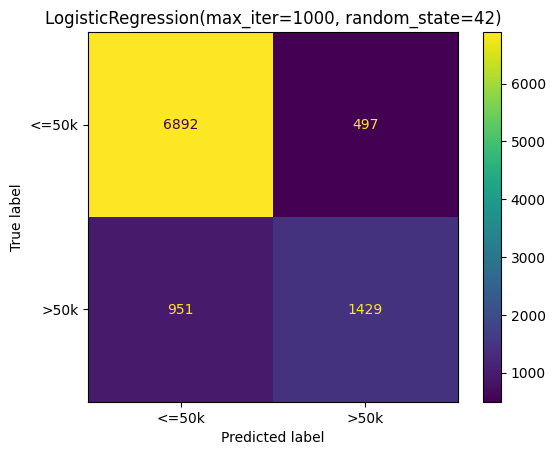

In [37]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, numerical_cols),
    ('cat', cat_pipe, categorical_cols)
])

modelnames = ['Decision Tree Classifier','Support Vector Classification - SVC','Bagging Classifier','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression']

models = [DecisionTreeClassifier(),
          SVC(gamma='scale'),
          BaggingClassifier(n_estimators=100),
          RandomForestClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100),
          LogisticRegression(max_iter=1000, random_state=42)]

scores=[]
# build the model
for model in models:
  i = make_pipeline(full_pipe, model)
  i.fit(X_train, y_train)
  print(model, 'Accuracy : {:.2f}%'.format(accuracy_score(y_test,i.predict(X_test))*100))
  scores.append(accuracy_score(y_test,i.predict(X_test))*100)
  
  con_matrix = confusion_matrix(y_test, i.predict(X_test))
  disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix,display_labels=['<=50k','>50k'])
  disp.plot()
  plt.title(model)
  plt.show()


Ranking Results

In [64]:
t=0
for i in scores:
  print(modelnames[t],': {:.2f}%'.format(scores[t]))
  t=t+1
print('\n'+'Higest Accuracy Model:','\n'+modelnames[scores.index(max(scores))],'{:.2f}%'.format(max(scores)))

Decision Tree Classifier : 82.15%
Support Vector Classification - SVC : 83.67%
Bagging Classifier : 84.56%
RandomForestClassifier : 84.27%
GradientBoostingClassifier : 86.60%
LogisticRegression : 85.18%

Higest Accuracy Model: 
GradientBoostingClassifier 86.60%
